## 1. Import & Load Data

In [1]:
# Import Dependencies
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
#Load data
data_dir = 'CleanedDataSet' 

In [4]:
#Use the Dataset API with the image_dataset_from_directory pipieline. This reduces computational load, sorts images by class and many other standard steps before image processing
data = tf.keras.utils.image_dataset_from_directory('CleanedDataSet')

Found 4290 files belonging to 5 classes.


## 2. Make a few quality checks

In [5]:
class_names = data.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


2024-08-06 11:49:12.409724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


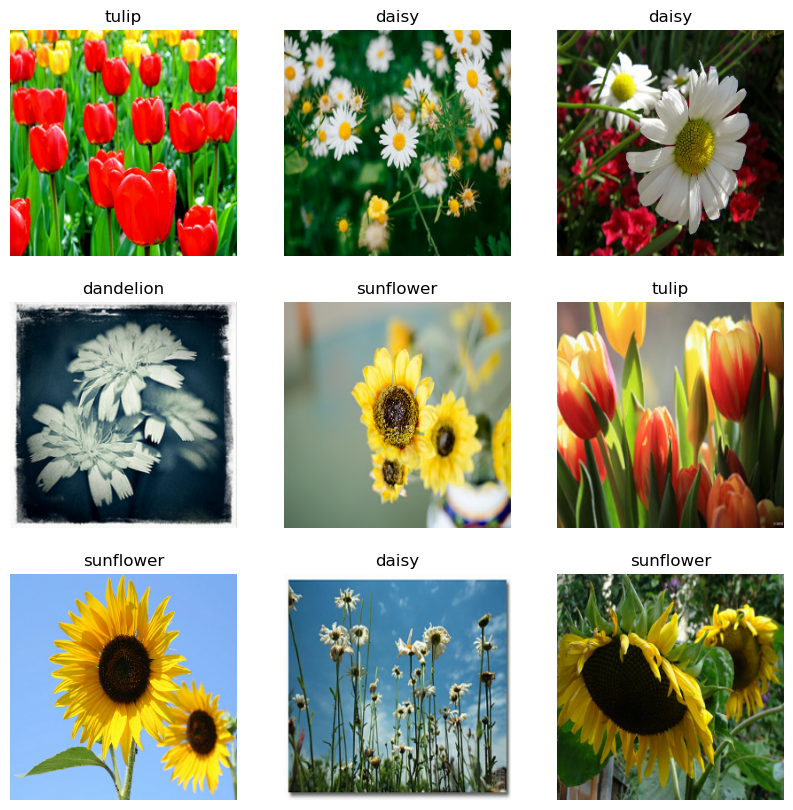

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## 3. Create a dataset

In [8]:
batch_size = 32
img_height = 256
img_width = 256

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'CleanedDataSet',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4290 files belonging to 5 classes.
Using 3432 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'CleanedDataSet',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4290 files belonging to 5 classes.
Using 858 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


2024-08-06 11:51:43.071083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


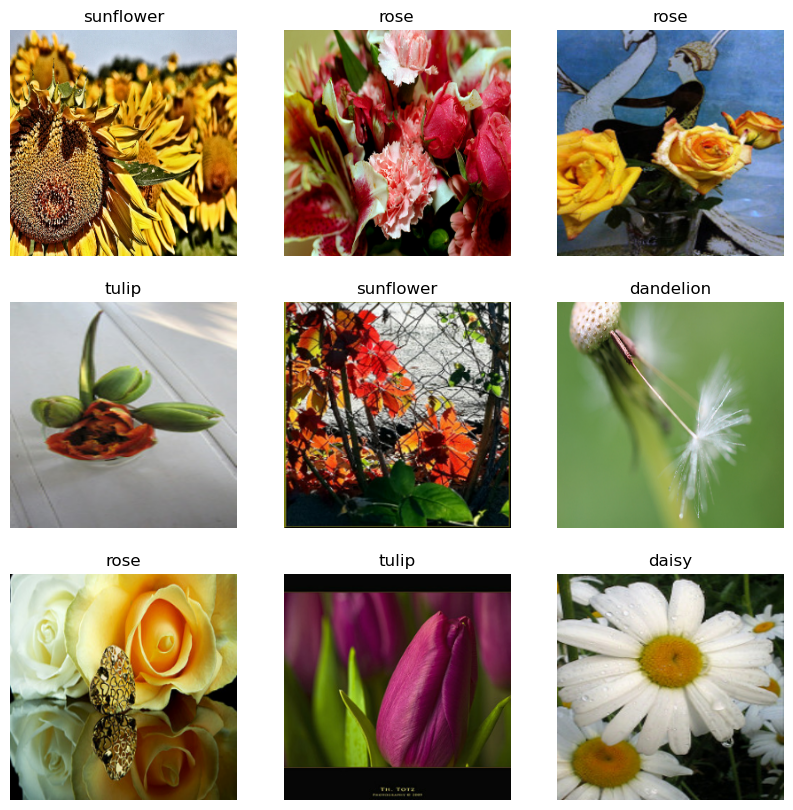

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Convert images to arrays

In [23]:
#Convert the images and their labels to numpy arrays
for image_batch, labels_batch in train_ds:
    image_batch.numpy()
    labels_batch.numpy()
    print(image_batch[0])
    print(labels_batch[0])
    break

for image_batch, labels_batch in val_ds:
    image_batch.numpy()
    labels_batch.numpy()
    print(image_batch[0])
    print(labels_batch[0])
    break

tf.Tensor(
[[[228.       239.       245.      ]
  [221.65625  232.65625  236.84375 ]
  [221.84375  232.84375  236.84375 ]
  ...
  [121.3125   122.3125   116.3125  ]
  [123.09375  124.09375  118.09375 ]
  [124.       125.       119.      ]]

 [[224.11523  234.25195  240.6836  ]
  [221.29205  232.21112  236.43909 ]
  [223.66473  234.66473  238.66473 ]
  ...
  [135.55664  136.55664  130.55664 ]
  [125.440796 126.440796 120.440796]
  [124.       125.       119.      ]]

 [[219.3164   228.21094  235.26367 ]
  [220.98553  231.69257  236.02655 ]
  [225.82025  236.71478  240.76752 ]
  ...
  [153.44897  154.44897  148.44897 ]
  [127.92975  128.92975  122.92975 ]
  [124.21094  125.21094  119.21094 ]]

 ...

 [[232.73633  233.89453  235.8418  ]
  [230.11316  231.27136  233.21863 ]
  [236.28033  237.43854  239.3858  ]
  ...
  [161.90405  158.90405  152.30554 ]
  [146.47522  143.47522  138.47522 ]
  [142.42188  139.42188  134.42188 ]]

 [[231.29492  230.58984  233.1582  ]
  [229.09125  229.41632  2

# Train Model 

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers

In [ ]:
# Define a simple CNN model with Data Augmentation
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [34]:
# Define a simple CNN model 
model = Sequential([
    Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Print model layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,078,725 (225.37 MB)

 Trainable params: 59,078,725 (225.37 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.4599 - loss: 1.2940 - val_accuracy: 0.2529 - val_loss: 1.9534
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5517 - loss: 1.1100 - val_accuracy: 0.2786 - val_loss: 2.5248
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.6219 - loss: 0.9930 - val_accuracy: 0.2564 - val_loss: 3.1815
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.6422 - loss: 0.9492 - val_accuracy: 0.2786 - val_loss: 3.0350
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6743 - loss: 0.8795 - val_accuracy: 0.2949 - val_loss: 3.8511
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.7412 - loss: 0.7018 - val_accuracy: 0.2867 - val_loss: 3.5812
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7725 - loss: 0.6276 - val_accuracy: 0.2995 - val_loss: 5.0542
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8046 - loss: 0.5327 - val_accu

# Plot Performance

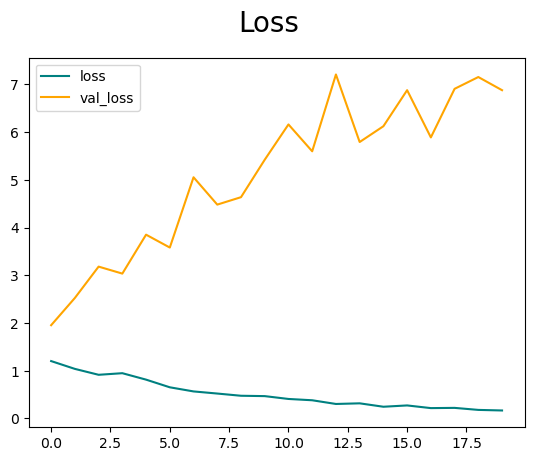

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

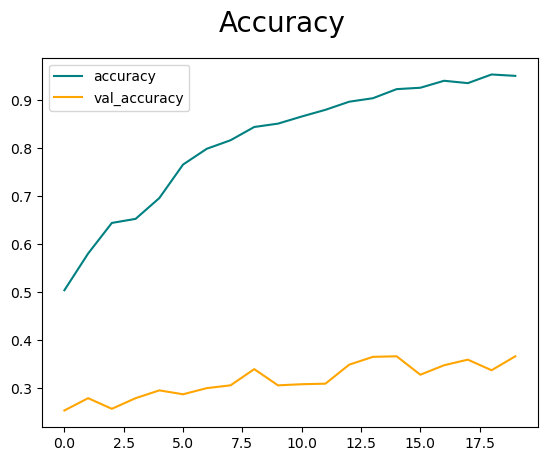

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate the model

<function matplotlib.pyplot.show(close=None, block=None)>

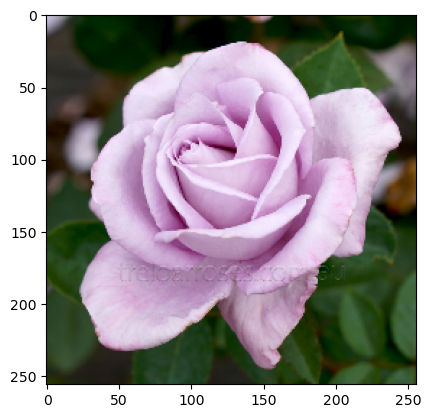

In [62]:
#img = cv2.imread('test_1.jpg')
img = tf.keras.utils.load_img(
    'test_1.jpg', target_size=(img_height, img_width)
)
plt.imshow(img)
plt.show

In [63]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
This image most likely belongs to daisy with a 40.46 percent confidence.


## --